# Notebook 5 - kNN & SVM



## Introduction

This notebook aims to compare two supervised classification algorithms, k-Nearest Neighbors (kNN) and Support Vector Machine (SVM), through a series of methodical steps ranging from data preparation to model evaluation. We will work on a previously cleaned dataset, focusing on feature selection, choice of hyperparameters, and performance evaluation using metrics such as confusion matrix and classification ratio. Finally, we will use GridSearch to optimize the models, compare their performance, and reflect on the challenges encountered in the process.

Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

##  Extract from the data preparation of Exercice 4
Explain with comments in the code what is performed here by the individual commands.

In [2]:

df= pd.read_csv('prepared_data2.csv')

dfPrepared = df.copy()
dfPrepared

,year,month,startClusterID,endClusterID,isHoliday,weekday,daytime,distance,count,total,categorie_count
0,2021,3,3254026000002,3254026000007,1,0,7,3,15,45,1
1,2021,3,3241013050002,3241013050008,1,3,17,0,10,0,0
2,2021,3,3241013050007,3241013030001,1,5,11,3,10,30,0
3,2021,3,3254028001012,3254028001004,1,2,13,0,15,0,1
4,2021,3,3254028001003,3241013070001,1,2,18,7,10,70,0
...,...,...,...,...,...,...,...,...,...,...,...
237482,2020,10,3241013050001,3241013080001,1,6,17,5,5,25,0
237483,2020,10,3254028001012,3254028001003,0,4,9,0,15,0,1
237484,2020,10,3254028001013,3254028003001,1,0,9,2,10,20,0
237485,2020,10,3254026000014,3254026000003,1,4,18,5,5,25,0


In [3]:
# drop column count and total but it is redondance for classification
dfPrepared =dfPrepared.drop(['count','total'], axis = 1)


## Data origin and explanation
We're going to pull the data set from notebook 4, which is already prepared and clean with predefined numerical values. We'll just scallop the scalable values.

We won't be scaling values such as year, because it's generally not relevant to scale columns such as year, month or day if these columns represent temporal or ordinal information that has no continuous mathematical relationship.

Look at the correlations with the heat map. Remove characteristics that correlate 100% with others.

In [4]:
from sklearn.preprocessing import minmax_scale

scaled = minmax_scale(dfPrepared[['startClusterID','endClusterID', 'distance' ]], feature_range = (0, 1))

dfPrepared['startClusterID'] = scaled[:,0]
dfPrepared['endClusterID'] = scaled[:,1]
dfPrepared['distance'] = scaled[:,2]

dfPrepared

,year,month,startClusterID,endClusterID,isHoliday,weekday,daytime,distance,categorie_count
0,2021,3,0.999846,0.999846,1,0,7,0.375,1
1,2021,3,0.000003,0.000003,1,3,17,0.000,0
2,2021,3,0.000003,0.000002,1,5,11,0.375,0
3,2021,3,1.000000,1.000000,1,2,13,0.000,1
4,2021,3,1.000000,0.000005,1,2,18,0.875,0
...,...,...,...,...,...,...,...,...,...
237482,2020,10,0.000003,0.000005,1,6,17,0.625,0
237483,2020,10,1.000000,1.000000,0,4,9,0.000,1
237484,2020,10,1.000000,1.000000,1,0,9,0.250,0
237485,2020,10,0.999846,0.999846,1,4,18,0.625,0


We've scaled some variables and not others because, as we explained above, it's best not to scale certain types of variable.

We've left categorie_count as these are our target value

## Training & evaluation of the models

In the following, the algorithms kNN and SVM are to be trained and tested. For this purpose, a data split of 70 % (training data) to 30 % (test data) must be carried out in advance.

In [5]:
from sklearn.model_selection import train_test_split

# we decide to reduced the dataset becau

we had a lot of data, which caused the KNN and SVM algorithm to bug, so we're going to use just 10% of this data

In [9]:
df_sampled = dfPrepared.sample(frac=0.1, random_state=100)
df_sampled.to_csv('df_sample_data.csv', index=False)
x = df_sampled.drop(['categorie_count'], axis = 1)
y = df_sampled['categorie_count'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                    random_state = 101, stratify = y, test_size = 0.3)

Since we're dealing with types of classification models, our target value will be the categorie_count characteristic, which is a characteristic resulting from a count classification.

## k-Nearest Neighbors (kNN)


We'll now create a KNN model and train it with our training data, testing it with different values of K 

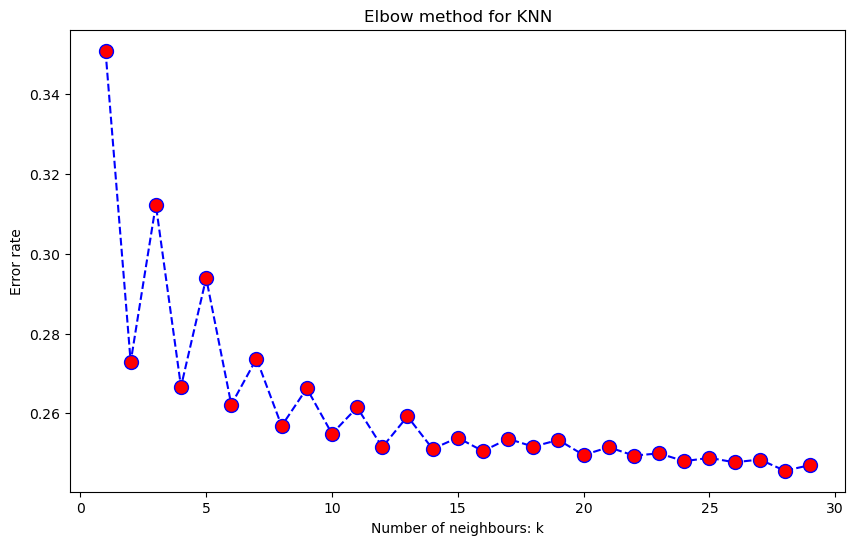

In [10]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rate = []  # Initialize a list to store error rates for each value of k

k_range = range(1, 30)  # Define the range of k values to test

# Loop through each value of k to evaluate its performance
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)  # Create a kNN classifier with k neighbors
    knn.fit(x_train, y_train)  # Train the classifier on the training data
    
    y_pred = knn.predict(x_test)  # Predict the labels for the test data
    
    # Compute the error rate (1 - accuracy) and append it to the list
    error_rate.append(1 - accuracy_score(y_test, y_pred))  

# Plot the error rates for each value of k
plt.figure(figsize=(10,6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)  # Plot the error rate vs k
plt.title('Elbow method for KNN')  # Title of the plot
plt.xlabel('Number of neighbours: k')  # X-axis label
plt.ylabel('Error rate')  # Y-axis label
plt.show()  # Display the plot


This code evaluates the performance of a kNN classifier for different numbers of neighbors (
𝑘
k) by calculating the error rate on the test data. We then visualize the error rates using the kink method, which allows us to identify the optimal value of 
𝑘
k for the classifier.

In this example, we choose k according to how the minimum error begins to stabilize - the elbow method.
We can see that in our case we have a K for 25

In [11]:
# for k =23
knn_model = KNeighborsClassifier(n_neighbors = 25) 
knn_model.fit(x_train, y_train) 
y_pred = knn_model.predict(x_test)

Let's take a quick look at the distribution of the predicted classes

In [12]:

# Count how many data points were classified as 0 and how many as 1
unique, counts = np.unique(y_pred, return_counts=True)

# Calculate percentage distribution
total = len(y_pred)
percentages = (counts / total) * 100

# Output of the results
for u, count, percentage in zip(unique, counts, percentages):
    print(f'Class {u}: {count} Datapoints ({percentage:.2f}%)')

Class 0: 6944 Datapoints (97.46%)
Class 1: 181 Datapoints (2.54%)


The results show that the majority of data were classified in class 0, representing around 83% of data points. In contrast, only 17% of data points were classified in class 1. This could indicate an imbalance in the classes, with one class largely dominating over the other.

Our distribution becomes obvious when we visualize the data points. To do this, n-dimensional data is reduced to three dimensions using PCA (principal component analysis). PCA doesn't just select three existing features; it generates new features, called principal components, which are linear combinations of the original ones. The aim of PCA is to reduce dimensionality while preserving as much of the data variance as possible.

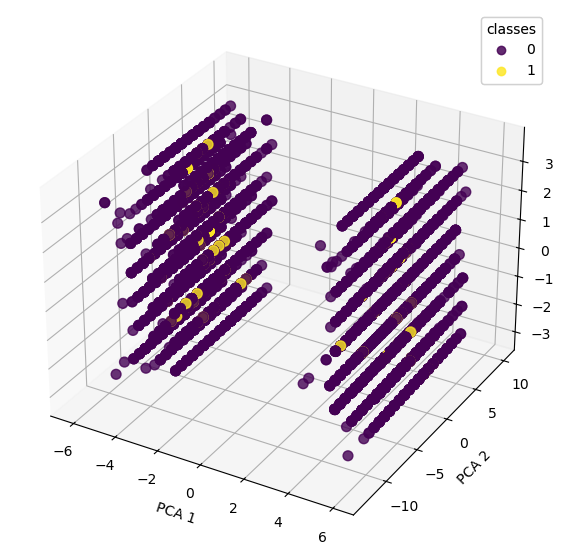

In [13]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Dimension reduction to 3 dimensions using PCA
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Visualisation of the test data points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot with the test data and the prediction (y_pred) as colours
scatter = ax.scatter(x_test_pca[:, 0], x_test_pca[:, 1], x_test_pca[:, 2], 
                     c=y_pred, cmap='viridis', s=50, alpha=0.8)

# Add colour bars to display the classes
legend1 = ax.legend(*scatter.legend_elements(), title="classes")
ax.add_artist(legend1)

# Axis labelling
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

#### Model evaluation
Then use the scorer or other addressed methods to evaluate the Confusion Matrix and the accuracy of your models.

In [12]:
from sklearn.metrics import classification_report
# display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      5428
           1       0.36      0.06      0.10      1697

    accuracy                           0.75      7125
   macro avg       0.56      0.51      0.48      7125
weighted avg       0.67      0.75      0.68      7125



In [13]:
from sklearn.metrics import confusion_matrix
#display the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[5253  175]
 [1598   99]]


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)  
print(f'Accuracy: {accuracy:.2f}')  # Print the accuracy as a percentage (formatted to 2 decimal places)

# Compute the confusion matrix and extract the individual components
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  
# tn = True Negatives, fp = False Positives, fn = False Negatives, tp = True Positives

# Calculate the True Positive Rate (TPR) - also known as Sensitivity or Recall
tpr = tp / (tp + fn)  # Formula: TP / (TP + FN)
print(f'True Positive Rate (TPR): {tpr:.2f}')  # Print TPR as a percentage

# Calculate the False Positive Rate (FPR)
fpr = fp / (fp + tn)  # Formula: FP / (FP + TN)
print(f'False Positive Rate (FPR): {fpr:.2f}')  # Print FPR as a percentage


Accuracy: 0.75
True Positive Rate (TPR): 0.06
False Positive Rate (FPR): 0.03


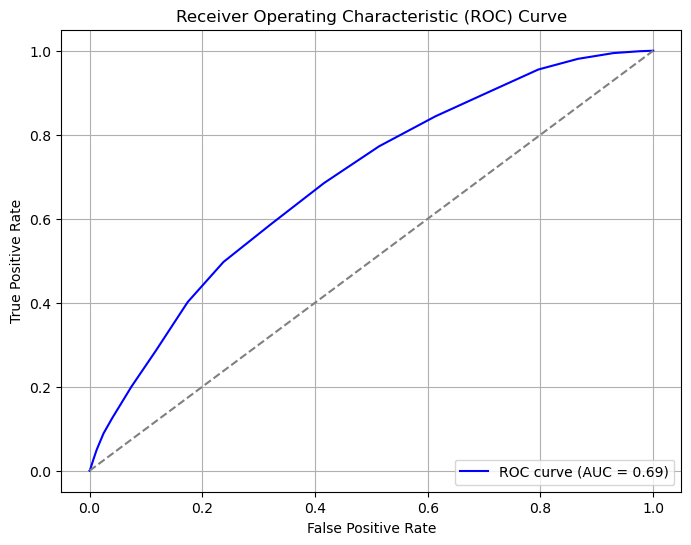

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class (class 1) from the kNN model
y_proba = knn_model.predict_proba(x_test)[:, 1]  


# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the Area Under the Curve (AUC) score for the ROC curve
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))  
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')  # Plot FPR vs. TPR and add AUC to the label
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot the diagonal line representing random guessing
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')  
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Title of the plot
plt.legend(loc='lower right') 
plt.grid(True)  
plt.show()  


## Interpretation

The results show an overall accuracy of 75%, but this metric is misleading due to class imbalance. For the majority class (0), the model achieves an accuracy of 77% and a recall of 97%, meaning that it correctly identifies most negatives. However, for the minority class (1), performance is very poor, with a recall of just 6% (the model barely detects true positives) and an accuracy of 36%. The low TPR (0.06) and low FPR (0.03) reflect this difficulty in balancing performance between classes. This indicates that the model largely favors the majority class and is not suitable for unbalanced data.

##  kNN with shepards method

### Let's look at the same algorithm with the sheparp method

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      5428
           1       0.29      0.23      0.26      1697

    accuracy                           0.68      7125
   macro avg       0.53      0.53      0.53      7125
weighted avg       0.66      0.68      0.67      7125



The results show a slight improvement for the minority class (1), with recall rising from 6% to 23% and f1-score from 0.10 to 0.26. However, overall performance (accuracy) decreased from 75% to 68%, indicating a compromise between the two classes.

##  Support Vector Machine
Let's try entering our SVM on our data and test the kernel and gamma parameters with respective values 

 kernel='rbf': Specifies the Radial Basis Function kernel, which is suitable for non-linear data.
 gamma='scale': Determines the influence of each data point; 'scale' adjusts gamma automatically based on the data.
 random_state=1: Ensures reproducibility by fixing the random seed.

In [61]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine (SVM) model with an RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale', random_state=1)


# Train the SVM model on the training dataset
svm_model.fit(x_train, y_train)

# Use the trained model to make predictions on the test dataset
y_pred = svm_model.predict(x_test)


#### Model evaluation
Let's move on to the evaluation of our model, using different tools

In [14]:
import numpy as np

# Count how many data points were classified as 0 and how many as 1
unique, counts = np.unique(y_pred, return_counts=True)

# Calculate percentage distribution
total = len(y_pred)
percentages = (counts / total) * 100

# Output of the results
for u, count, percentage in zip(unique, counts, percentages):
    print(f'Class {u}: {count} Datapoints ({percentage:.2f}%)')

Class 0: 6944 Datapoints (97.46%)
Class 1: 181 Datapoints (2.54%)


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      5389
           1       0.40      0.04      0.08      1736

    accuracy                           0.75      7125
   macro avg       0.58      0.51      0.47      7125
weighted avg       0.67      0.75      0.67      7125



In [16]:
import numpy as np

# Count how many data points were classified as 0 and how many as 1
unique, counts = np.unique(y_pred, return_counts=True)

# Calculate percentage distribution
total = len(y_pred)
percentages = (counts / total) * 100

# Output of the results
for u, count, percentage in zip(unique, counts, percentages):
    print(f'Class {u}: {count} Datapoints ({percentage:.2f}%)')

Class 0: 6944 Datapoints (97.46%)
Class 1: 181 Datapoints (2.54%)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)  
print(f'Accuracy: {accuracy:.2f}')  
# Accuracy is the proportion of correctly predicted instances (both positive and negative) over the total dataset.

# Compute the confusion matrix and extract its components
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  

# Calculate the True Positive Rate (TPR), also called Sensitivity or Recall
tpr = tp / (tp + fn)  
print(f'True Positive Rate (TPR): {tpr:.2f}')  
# Formula: TPR = TP / (TP + FN), which measures how well the model identifies actual positives.

# Calculate the False Positive Rate (FPR)
fpr = fp / (fp + tn)  
print(f'False Positive Rate (FPR): {fpr:.2f}')  


Accuracy: 0.75
True Positive Rate (TPR): 0.04
False Positive Rate (FPR): 0.02


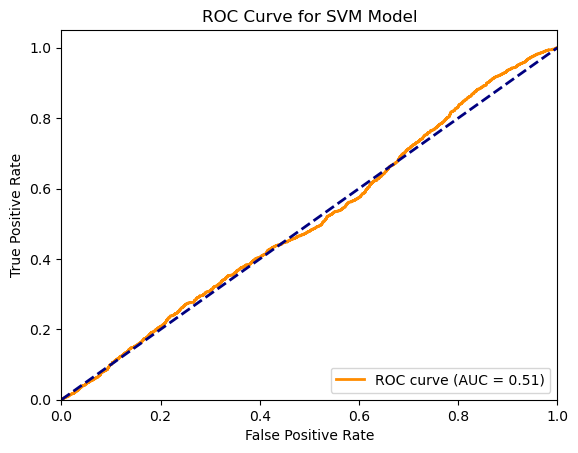

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

# Activate SVC model with probabilities
svm_model = SVC(kernel='rbf', gamma='scale', random_state=1, probability=True)
svm_model.fit(x_train, y_train)

# Predict probabilities (only for the positive class)
y_prob = svm_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC-Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc="lower right")
plt.show()

### Evaluation of the algorithms
The SVM results show an overall accuracy of 75%, but performance is unbalanced between classes. For the majority class (0), the model achieves a recall of 98% and an f1-score of 0.86, meaning that it detects almost all negatives. However, for the minority class (1), performance is very poor with a recall of just 4% and an f1-score of 0.08, indicating that the model largely fails to identify true positives. Although the FPR is low (2%), the low TPR for the minority class underlines that the model favors the majority class and is not suited to unbalanced data.

## Comparaison of the algorithms

Comparing the performance of the KNN and SVM models, the KNN shows a better ability to detect the minority class (1) with a recall of 23% and an f1-score of 0.26, compared with only 4% recall and an f1-score of 0.08 for the SVM. This indicates that KNN performs slightly better in detecting true positives, although it sacrifices some overall accuracy (68% vs. 75% for SVM). In contrast, SVM favors the majority class (0), achieving a recall of 98% and an f1-score of 0.86, which explains its better accuracy. However, these results show that neither KNN nor SVM effectively manage class imbalance, as both models have significant difficulties in correctly identifying the minority class.


## 5.4 Optimization with GridSearch ( Preview)
GridSearch is a technique used for hyperparameter optimization. It systematically evaluates all possible combinations of the specified hyperparameters by testing each one iteratively. The combination that achieves the best performance (based on a chosen evaluation metric) is selected as the optimal set of hyperparameters.

In [19]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## SVM

In [ ]:
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC(random_state=1)

# Specify the grid of hyperparameters to test
param_grid1 = {"kernel": ["poly", "rbf", "sigmoid"], 
               "gamma": ["scale", "auto"]}

# Perform GridSearchCV to find the best combination of parameters
gridSearch1 = GridSearchCV(estimator=svm_model, param_grid=param_grid1)
gridSearch1.fit(x_train, y_train)  # Fit the model on the training data

# Convert GridSearch results into a DataFrame for analysis
results1 = pd.DataFrame(gridSearch1.cv_results_)

# Retrieve the parameters of the best-performing model
params1 = results1.loc[results1['rank_test_score'].idxmax()]
params1['params']  # Output the best parameter combination


 train the model with the best parameters.

In [20]:
svm_model = SVC(kernel = 'linear', gamma = 'scale', random_state = 1)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

 look at the ConfusionMatrix again and compare.

In [21]:
print(confusion_matrix(y_test, y_pred))

[[5389    0]
 [1736    0]]


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute confusion matrix and extract the values for TN, FP, FN, TP
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate and print the True Positive Rate (TPR)
tpr = tp / (tp + fn)
print(f'True Positive Rate (TPR): {tpr:.2f}')

# Calculate and print the False Positive Rate (FPR)
fpr = fp / (fp + tn)
print(f'False Positive Rate (FPR): {fpr:.2f}')


Accuracy: 0.76
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.00


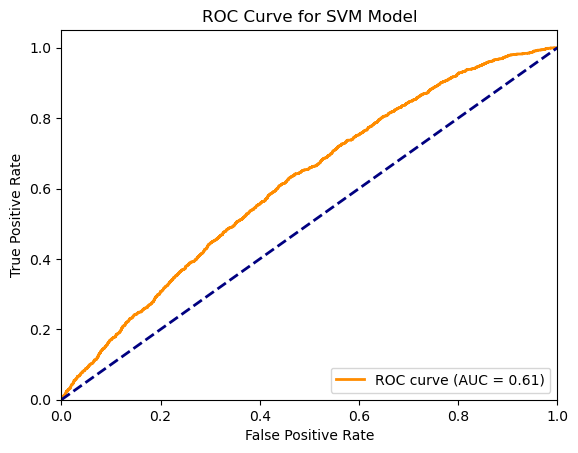

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

# Create and train an SVM model with a sigmoid kernel and probability estimates
svm_model = SVC(kernel='sigmoid', gamma='scale', random_state=1, probability=True)
svm_model.fit(x_train, y_train)

# Get the predicted probabilities for the positive class
y_prob = svm_model.predict_proba(x_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Label for x-axis
plt.ylabel('True Positive Rate')  # Label for y-axis
plt.title('ROC Curve for SVM Model')  # Title of the plot
plt.legend(loc="lower right")  # Position of the legend
plt.show()  # Display the plot


## K-Nearest Neighbours

 convert GridSearch for k-Nearest Neighbors and select different values for metric and n_neighbors in param_grid.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(1, 65, 2),  # Tester les valeurs impaires de 1 à 30
    'weights': ['uniform', 'distance'],  # Pondération uniforme ou basée sur la distance
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']  # Différents types de distances
}

# gridSearch = GridSearchCV(estimator = knn_model, param_grid = param_grid)
# Configurer GridSearchCV
gridSearch = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
gridSearch.fit(x_train, y_train)

# results = pd.DataFrame(gridSearch.cv_results_)

print("Meilleurs paramètres:", gridSearch.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Meilleurs paramètres: {'metric': 'chebyshev', 'n_neighbors': 47, 'weights': 'uniform'}


In [25]:
from sklearn.neighbors import KNeighborsClassifier 

knn_model = gridSearch.best_estimator_
y_pred = knn_model.predict(x_test)

look at the ConfusionMatrix again and compare.

In [26]:
print("\n Classification report :\n", classification_report(y_test, y_pred))
print("\n confusion matrix:\n", confusion_matrix(y_test, y_pred))


 Classification report :
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      5389
           1       0.00      0.00      0.00      1736

    accuracy                           0.76      7125
   macro avg       0.38      0.50      0.43      7125
weighted avg       0.57      0.76      0.65      7125


 confusion matrix:
 [[5389    0]
 [1736    0]]


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute confusion matrix and unpack values for TN, FP, FN, TP
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate and print the True Positive Rate (TPR)
tpr = tp / (tp + fn)
print(f'True Positive Rate (TPR): {tpr:.2f}')

# Calculate and print the False Positive Rate (FPR)
fpr = fp / (fp + tn)
print(f'False Positive Rate (FPR): {fpr:.2f}')


Accuracy: 0.76
True Positive Rate (TPR): 0.00
False Positive Rate (FPR): 0.00


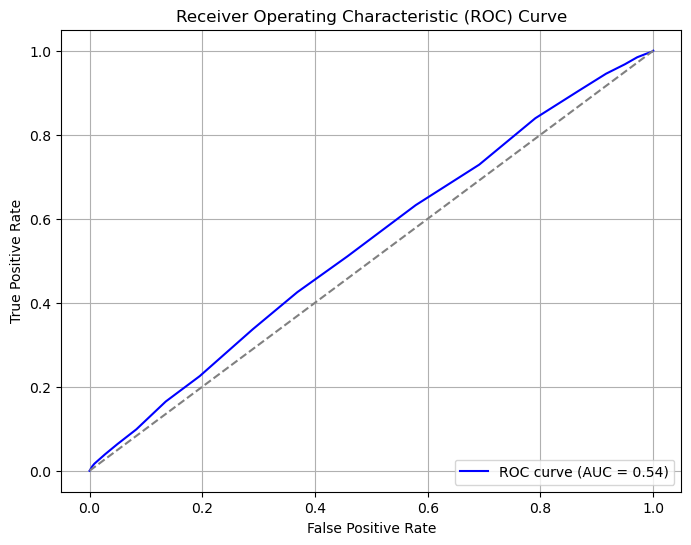

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# Train the KNN model on the training set
knn_model.fit(x_train, y_train)

# Get the predicted probabilities for the positive class (class 1)
y_proba = knn_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve values: False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the AUC (Area Under the Curve) score
auc_score = roc_auc_score(y_test, y_proba)

# Create a plot for the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 
plt.xlabel('False Positive Rate')  # Label the x-axis
plt.ylabel('True Positive Rate')  # Label the y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Title for the plot
plt.legend(loc='lower right') 
plt.grid(True)
plt.show() 


## Reflexion

What was difficult/unexpected?

One of the difficulties I faced was that I couldn’t use the entire dataset for the models due to computational limitations, so I had to work with only 10% of the data. This significantly reduced the size of the training and testing sets, which may have impacted the performance of the models. Additionally, the task of adding hyperparameters, such as adjusting the number of neighbors in KNN or kernel functions in SVM, was challenging. Despite making changes to these parameters, I didn't observe significant improvements in model performance, which was unexpected. This suggests that the models may have already reached their optimal configurations with the default parameters.

Where were there alternatives?

An alternative could have been using a larger, more representative sample of the data, if possible. For example, using more sophisticated sampling techniques like stratified sampling or cross-validation might have led to better performance despite working with smaller data. Also, instead of relying solely on GridSearch for hyperparameter optimization, exploring other methods like RandomizedSearchCV could have been an alternative to quickly test a larger parameter space.

What did you take with you?

From this experience, I learned that data size can play a crucial role in the performance of machine learning models, and that tuning hyperparameters is not always straightforward, especially when the changes don’t lead to noticeable improvements. It also highlighted the importance of having enough data and sufficient computational power for more effective modeling.